In [10]:
import numpy as np
import pandas as pd

# k-Nearest Neighbors algorithm

 In this tutorial you are going to learn about the k-Nearest Neighbors algorithm including how it works and how to implement it from scratch in Python.After completing this tutorial you will know:

<li>How to code the k-Nearest Neighbors algorithm step-by-step.</li>
<li>How to evaluate k-Nearest Neighbors on a real dataset.</li>
<li>How to use k-Nearest Neighbors to make a prediction for new data.</li>

# k-Nearest Neighbors (in 3 easy steps)
First we will develop each piece of the algorithm in this section, then we will tie all of the elements together into a working implementation applied to a real dataset in the next section.

This k-Nearest Neighbors tutorial is broken down into 3 parts:

<li>Step 1: Calculate Euclidean Distance.</li>
<li>Step 2: Get Nearest Neighbors.</li>
<li>Step 3: Make Predictions.</li>

# Step 1: Calculate Euclidean Distance

We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors.

In [11]:
# Test distance function
dataset = np.array([[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]])

In [12]:
def euclidean_distance(a , b):
    # a,b are two given vector
    # use euclidean_distance formula and complete function
    dis = np.linalg.norm(a-b)
    return dis

In [13]:
row0 = dataset[0]
for row in dataset:
    distance = euclidean_distance(row0[:-1], row[:-1])
    print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.5591439385540549
0.5356280721938492
4.850940186986411
2.592833759950511
4.214227042632867
6.522409988228337
4.985585382449795


0.0<br>
1.3290173915275787<br>
1.9494646655653247<br>
1.5591439385540549<br>
0.5356280721938492<br>
4.850940186986411<br>
2.592833759950511<br>
4.214227042632867<br>
6.522409988228337<br>
4.985585382449795<br>

# Step 2: Get Nearest Neighbors

Neighbors for a new piece of data in the dataset are the k closest instances, as defined by our distance measure.

To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.

Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.

In [14]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    #find distance w.r.t test_row and append in distances
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    #sort distances (hint: use key)
    distances.sort(key=lambda tup: tup[1])
    
    #append neighbors in list
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [15]:
neighbors = get_neighbors(dataset, dataset[0], 3)
for neighbor in neighbors:
    print(neighbor)

[2.7810836 2.550537  0.       ]
[3.06407232 3.00530597 0.        ]
[1.46548937 2.36212508 0.        ]


[2.7810836, 2.550537003, 0]<br>
[3.06407232, 3.005305973, 0]<br>
[1.465489372, 2.362125076, 0]<br>


<br>
<br>
<br>
<br>

# Step 3: Make Predictions
The most similar neighbors collected from the training dataset can be used to make predictions.

In the case of classification, we can return the most represented class among the neighbors.

We can achieve this by performing the max() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the max() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.

In [16]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    #get output values from neighbours
    output_values = [row[-1] for row in neighbors]
    #find most represented class among the neighbors.
    prediction = max(set(output_values), key=output_values.count)
    return prediction


In [17]:
prediction = predict_classification(dataset, dataset[0], 3)
print('Expected %d, Got %d.' % (dataset[0][-1], prediction))

Expected 0, Got 0.


Expected 0, Got 0.
<br>
<br>
<br>
load iris dataset and predict.

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
dataset = pd.read_csv(r"C:\Users\Gray\Downloads\IRIS.csv")
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
sepal=dataset.drop(['petal_length','petal_width','species'],1)
sepal.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


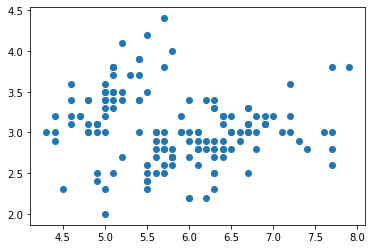

In [23]:
plt.scatter(sepal['sepal_length'],sepal['sepal_width'])

In [24]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
y_pred=km.fit_predict(sepal)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [26]:
sepal['cluster']=y_pred
sepal

,sepal_length,sepal_width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


Text(0, 0.5, 'sepal_width')

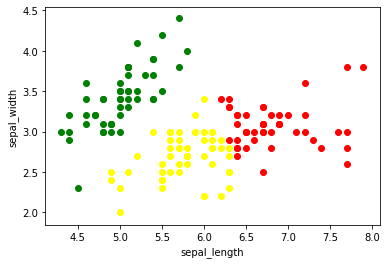

In [27]:
sep1=sepal[sepal.cluster==0]
sep2=sepal[sepal.cluster==1]
sep3=sepal[sepal.cluster==2]

plt.scatter(sep1['sepal_length'],sep1['sepal_width'],color='green')
plt.scatter(sep2['sepal_length'],sep2['sepal_width'],color='red')
plt.scatter(sep3['sepal_length'],sep3['sepal_width'],color='yellow')

plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [28]:
centroid=km.cluster_centers_
centroid

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

Text(0, 0.5, 'sepal_width')

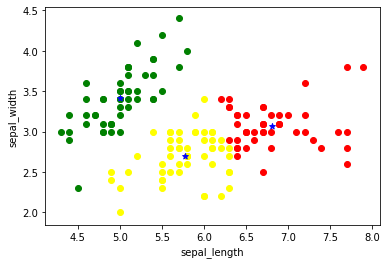

In [29]:
plt.scatter(sep1['sepal_length'],sep1['sepal_width'],color='green')
plt.scatter(sep2['sepal_length'],sep2['sepal_width'],color='red')
plt.scatter(sep3['sepal_length'],sep3['sepal_width'],color='yellow')
plt.scatter(centroid[:,0],centroid[:,1],color='blue',marker='*')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

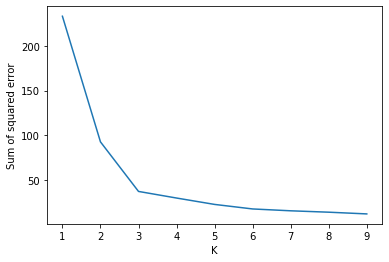

In [30]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(sepal)
    sse.append(km.inertia_)
    
sse


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [32]:
dataset['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [34]:
new_data=dataset.drop('species',1)
new_data.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
